##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
!pip install plotly
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

##Dataset Collection
###ECG500 Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
!wget https://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip

--2024-09-16 20:52:09--  https://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 212.78.75.243
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|212.78.75.243|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  8.02MB/s    in 1.3s    

2024-09-16 20:52:11 (8.02 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]



##Data Transformation

In [ ]:
with ZipFile('ECG5000.zip', 'r') as zip :
   zip.extractall(path='/content/dataset')

In [ ]:
df1 = pd.read_csv('/content/dataset/ECG5000_TRAIN.txt', sep='\s+', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [ ]:
df1.shape

(500, 141)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 550.9 KB


In [ ]:
df2 = pd.read_csv('/content/dataset/ECG5000_TEST.txt', sep='\s+', header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,...,-0.032477,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073
1,1.0,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,...,0.937984,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009
2,1.0,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,...,0.368820,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767
3,1.0,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,...,0.894638,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853
4,1.0,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,...,1.416582,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 4.8 MB


In [ ]:
df = pd.concat([df1, df2])
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
4141,2.0,0.989610,1.204129,1.243712,0.613097,0.252857,-0.412738,-0.722757,-0.950854,-1.220323,...,-1.421217,-1.789592,-2.208129,-2.809408,-3.330411,-3.706877,-4.486631,-4.023383,-4.105307,-1.949539
116,1.0,-1.527755,-4.038558,-4.330706,-4.259849,-3.803681,-3.146532,-1.794671,-1.245076,-1.016098,...,0.966917,1.113873,1.269934,1.340666,1.267786,1.005727,0.648683,0.883008,0.931195,-1.355104
3006,2.0,-0.064800,-1.069721,-1.805211,-2.264414,-2.408329,-2.506364,-2.391005,-2.188613,-1.779853,...,-0.264888,-0.916723,-1.535688,-2.111366,-3.256629,-3.937415,-4.351801,-3.656471,-3.026745,-1.826573
2727,2.0,-0.003353,-0.385461,-0.703012,-1.547400,-1.822805,-1.985621,-2.227308,-2.315329,-2.310694,...,-0.752922,-1.451656,-2.010165,-2.787527,-3.482707,-3.986172,-4.189650,-3.213814,-2.792880,-1.295075
1576,1.0,0.813262,-0.905941,-3.035011,-4.379060,-4.226116,-3.503417,-2.571669,-1.877400,-1.631181,...,1.093307,1.117617,1.498161,1.753414,1.639496,1.187775,0.943470,1.008112,0.746052,-1.152291


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [ ]:
df = df.add_prefix('c')
df.sample(5)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
2011,1.0,-0.118070,-2.291225,-3.774218,-4.337805,-4.050447,-3.046855,-1.981916,-1.556952,-1.239085,...,1.261709,1.292376,1.157311,0.993086,0.822245,0.584421,0.629313,0.824565,0.336861,-2.115637
2623,1.0,-1.693958,-3.318677,-3.784877,-4.073614,-3.864253,-3.347139,-2.322313,-1.650408,-1.454390,...,1.178706,1.234095,1.209287,1.166618,0.903829,0.637425,0.944447,0.827138,-0.182124,-1.924306
2945,2.0,-0.030118,-1.161544,-2.250567,-2.796692,-3.078229,-3.077462,-2.883260,-2.718984,-2.140847,...,-0.918710,-1.415321,-1.976033,-2.904464,-3.703459,-3.594801,-2.839941,-1.472944,-0.608824,0.084712
3649,2.0,0.783276,-0.409988,-1.191364,-2.140451,-2.667090,-2.903232,-2.887713,-2.660213,-2.369296,...,-2.895470,-3.347856,-3.597840,-3.168824,-1.982222,-1.079927,-0.127158,0.759720,0.156334,0.792471
232,1.0,-0.109900,-1.878897,-2.993719,-4.071821,-3.963840,-3.134457,-1.960253,-1.542208,-1.451021,...,1.410719,1.492484,1.070516,0.174598,-0.703928,-1.336386,-1.356925,-0.690676,0.365975,-0.723915


In [ ]:
df['c0'].value_counts()

,count
c0,
1.0,2919
2.0,1767
4.0,194
3.0,96
5.0,24


##Importing Tensorflow Functions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.values, df.values[:,0:1], test_size=0.2, random_state=42)
scaler = MinMaxScaler()
data_scaled = scaler.fit(x_train)

In [ ]:
x_train_scaled = data_scaled.transform(x_train)
x_test_scaled = data_scaled.transform(x_test)

In [ ]:
x_train_scaled

array([[0.25      , 0.53813398, 0.59585633, ..., 0.11775889, 0.0569781 ,
        0.17124168],
       [0.25      , 0.53857438, 0.58850356, ..., 0.26561097, 0.25063599,
        0.22736195],
       [0.        , 0.317557  , 0.18654775, ..., 0.71455568, 0.70718614,
        0.51703033],
       ...,
       [0.        , 0.45442466, 0.35540716, ..., 0.77837157, 0.74294265,
        0.50709418],
       [0.25      , 0.40345124, 0.39132017, ..., 0.4868497 , 0.50193227,
        0.47770011],
       [0.        , 0.37134117, 0.25002207, ..., 0.71048947, 0.65626497,
        0.35023474]])

In [ ]:
normal_train = pd.DataFrame(x_train_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
annomaly_train = pd.DataFrame(x_train_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [ ]:
normal_test = pd.DataFrame(x_test_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
annomaly_test = pd.DataFrame(x_test_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

##Representation of Difference b/w Normal and Abnormal Scale Values

In [ ]:
feature1_idx = 0
feature2_idx = 50
feature3_idx = 100

fig_normal = go.Figure(data=[go.Scatter3d(
    x=normal_train[:, feature1_idx],
    y=normal_train[:, feature2_idx],
    z=normal_train[:, feature3_idx],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig_normal.update_layout(title='Normal ECG Data',
                  scene=dict(
                      xaxis_title='Feature 1',
                      yaxis_title='Feature 2',
                      zaxis_title='Feature 3'),
                      width=600,
                      height=500)

fig_normal.show()

In [ ]:
fig_anomaly = go.Figure(data=[go.Scatter3d(
    x=annomaly_train[:, feature1_idx],
    y=annomaly_train[:, feature2_idx],
    z=annomaly_train[:, feature3_idx],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig_anomaly.update_layout(title='Anomaly ECG Data',
                  scene=dict(
                      xaxis_title='Feature 1',
                      yaxis_title='Feature 2',
                      zaxis_title='Feature 3'),
                  width=600,
                  height=500)
fig_anomaly.show()

In [ ]:
normal_sample = normal_train[0]
anomaly_sample = annomaly_train[0]

fig = go.Figure(data=[go.Scatter3d(
    x=list(range(len(normal_sample))),
    y=normal_sample,
    z=[0] * len(normal_sample),
    mode='markers',
    name='Normal'
),
go.Scatter3d(
    x=list(range(len(anomaly_sample))),
    y=anomaly_sample,
    z=[1] * len(anomaly_sample),
    mode='markers',
    name='Anomaly'
)])

fig.update_layout(title='Normal vs Anomaly ECG Signals',
                  scene=dict(xaxis_title='Time', yaxis_title='Amplitude', zaxis_title='Category'), width=700, height=600)

fig.show()


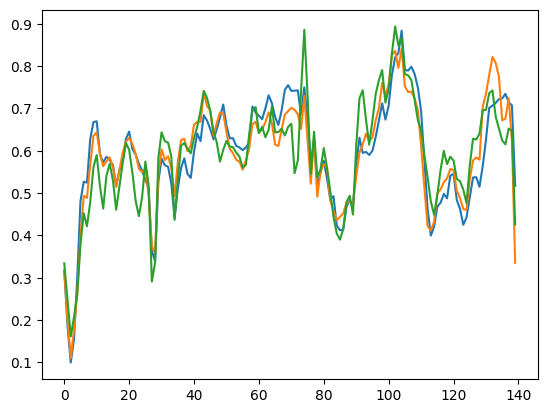

In [ ]:
plt.plot(normal_train[0])
plt.plot(normal_train[1])
plt.plot(normal_train[2])

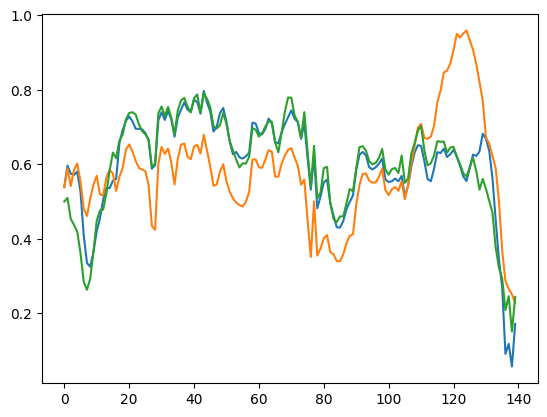

In [ ]:
plt.plot(annomaly_train[0])
plt.plot(annomaly_train[1])
plt.plot(annomaly_train[2])

##Autoencoder Model Architecture

In [ ]:
class AutoEncoder(Model) :
  def __init__(self) :
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu')])

    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(140,activation='sigmoid')])

  def call(self, x) :
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience=2,
                                                  mode = 'min')
model.compile(optimizer = 'adam', loss = 'mae')

In [ ]:
history = model.fit(normal_train, normal_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_train_scaled[:,1:], x_train_scaled[:,1:]),
                    shuffle=True,
                    callbacks=[early_stopping]
                    )

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - loss: 0.1254 - val_loss: 0.1087
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0852 - val_loss: 0.0807
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0540 - val_loss: 0.0757
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0471 - val_loss: 0.0749
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0465 - val_loss: 0.0747
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0461 - val_loss: 0.0745
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0468 - val_loss: 0.0739
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0466 - val_loss: 0.0738
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0457 - val_loss: 0.0732
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0459 - val_loss: 0.0721
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0441 - val_loss: 0.0697
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.

##Model Summary

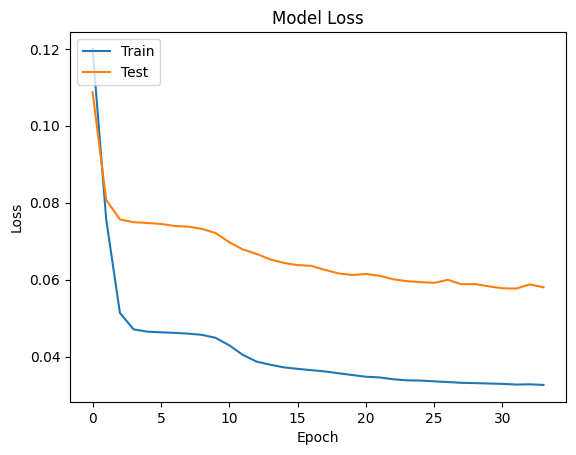

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [ ]:
model.summary()

Model: "auto_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 8)                   │          11,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 140)                 │          11,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,006 (277.37 KB)

 Trainable params: 23,668 (92.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,338 (184.92 KB)

In [ ]:
encoder = model.encoder(normal_test).numpy()
decoder = model.decoder(encoder).numpy()

In [ ]:
encoder.shape

(586, 8)

In [ ]:
decoder.shape

(586, 140)

##Reconstruction of the values to Normal Scales

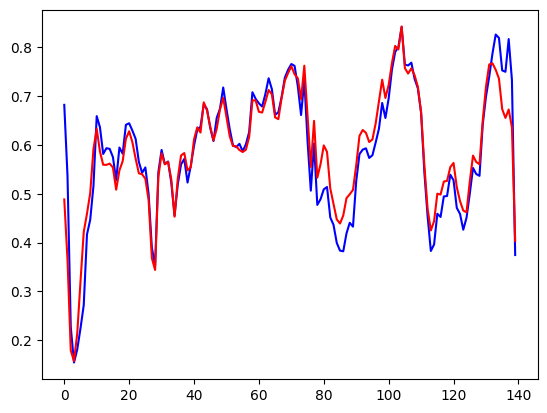

In [ ]:
plt.plot(normal_test[0],'b')
plt.plot(decoder[0],'r')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


(array([ 6., 19., 37., 42., 50., 49., 41., 40., 43., 30., 39., 25., 22.,
        19., 18., 11.,  7., 13.,  7.,  7.,  7.,  9.,  4.,  7.,  2.,  1.,
         5.,  5.,  3.,  1.,  4.,  0.,  3.,  0.,  0.,  1.,  0.,  1.,  1.,
         1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([0.01187203, 0.01400954, 0.01614705, 0.01828456, 0.02042207,
        0.02255958, 0.02469709, 0.02683461, 0.02897212, 0.03110963,
        0.03324714, 0.03538465, 0.03752216, 0.03965967, 0.04179718,
        0.04393469, 0.0460722 , 0.04820971, 0.05034723, 0.05248474,
        0.05462225, 0.05675976, 0.05889727, 0.06103478, 0.06317229,
        0.0653098 , 0.06744731, 0.06958482, 0.07172233, 0.07385985,
        0.07599736, 0.07813487, 0.08027238, 0.08240989, 0.0845474 ,
        0.08668491, 0.08882242, 0.09095993, 0.09309744, 0.09523495,
        0.09737247, 0.09950998, 0.10164749, 0.103785  , 0.10592251,
        0.10806002, 0.11019753, 0.11233504, 0.11447255, 0.11661006,
        0.11874757]),
 <BarContainer

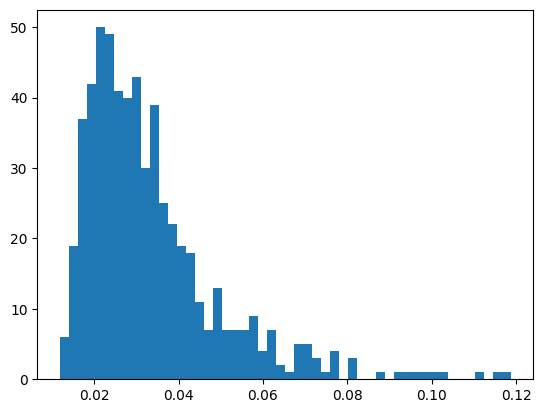

In [ ]:
reconstruction_normal = model.predict(normal_test)
train_loss_normal = tf.keras.losses.mae(reconstruction_normal, normal_test)

plt.hist(train_loss_normal, bins=50)

In [ ]:
np.mean(train_loss_normal)

0.033536363915007895

In [ ]:
np.std(train_loss_normal)

0.016502271339166097

In [ ]:
threshold = np.mean(train_loss_normal) + 2*np.std(train_loss_normal)
threshold

0.06654090659334008

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  1.,  5., 12., 26.,
        23., 33., 43., 46., 58., 38., 42., 33., 22., 11.,  1.,  4.,  1.,
         0.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.04100223, 0.04404257, 0.04708291, 0.05012325, 0.05316359,
        0.05620393, 0.05924427, 0.06228461, 0.06532495, 0.06836529,
        0.07140563, 0.07444597, 0.07748631, 0.08052665, 0.08356699,
        0.08660733, 0.08964767, 0.09268801, 0.09572835, 0.09876868,
        0.10180902, 0.10484936, 0.1078897 , 0.11093004, 0.11397038,
        0.11701072, 0.12005106, 0.1230914 , 0.12613174, 0.12917208,
        0.13221242, 0.13525276, 0.1382931 , 0.14133344, 0.14437378,
        0.14741412, 0.15045446, 0.1534948 , 0.15653514, 0.15957548,
        0.16261582, 0.16565616, 0.1686965 , 0.17173684, 0.17477718,
        0.17781752, 0.18085786, 0.1838982 , 0.18693854, 0.18997888,
        0.19301922]),
 <BarContainer

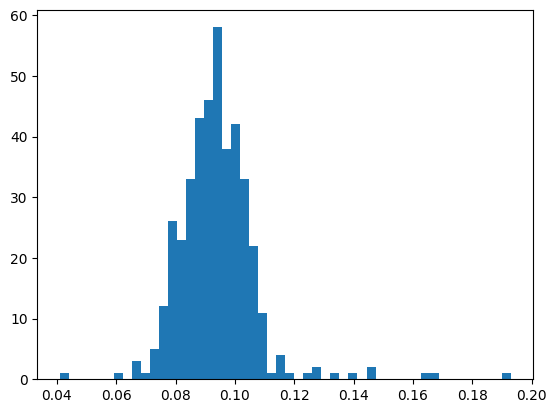

In [ ]:
reconstruction_annomaly = model.predict(annomaly_test)
train_loss_annomaly = tf.keras.losses.mae(reconstruction_annomaly, annomaly_test)

plt.hist(train_loss_annomaly, bins=50)

In [ ]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

def calculate_accuracy_and_plot(train_loss_annomaly, threshold, normal_test, annomaly_test):

    predictions = (train_loss_annomaly.numpy() > threshold).astype(int)
    accuracy = np.sum(predictions) / len(predictions) * 100


    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=normal_test[:, 0],
        y=normal_test[:, 1],
        z=train_loss_normal,
        mode='markers',
        name='Normal',
        marker=dict(
            size=5,
            color=train_loss_normal,
            colorscale='Viridis',
            opacity=0.8
        )
    ))

    fig.add_trace(go.Scatter3d(
        x=annomaly_test[:, 0],
        y=annomaly_test[:, 1],
        z=train_loss_annomaly.numpy(),
        mode='markers',
        name='Anomaly',
        marker=dict(
            size=5,
            color=train_loss_annomaly.numpy(),
            colorscale='Viridis',
            opacity=0.8
        )
    ))

    x_plane = np.linspace(np.min(normal_test[:, 0]), np.max(normal_test[:, 0]), 10)
    y_plane = np.linspace(np.min(normal_test[:, 1]), np.max(normal_test[:, 1]), 10)
    z_plane = np.full((10, 10), threshold)
    fig.add_surface(x=x_plane, y=y_plane, z=z_plane, showscale=False, opacity=0.5, name='Threshold')

    fig.update_layout(title="Accuracy: {:.2f}%".format(accuracy),
                      scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Reconstruction Error'),
                      width=800, height=600)

    fig.show()

calculate_accuracy_and_plot(train_loss_annomaly, threshold, normal_test, annomaly_test)

In [ ]:
np.mean(train_loss_annomaly)

0.09389030859289509

In [ ]:
np.std(train_loss_annomaly)

0.013223667033363628

In [ ]:
tf.math.less(train_loss_normal, threshold)

<tf.Tensor: shape=(586,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

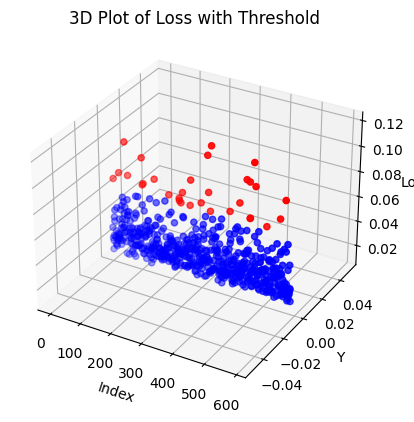

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(train_loss_normal))
y = np.zeros_like(x)
z = train_loss_normal

colors = ['blue' if val else 'red' for val in tf.math.less(train_loss_normal, threshold)]

ax.scatter(x, y, z, c=colors)

ax.set_xlabel('Index')
ax.set_ylabel('Y')
ax.set_zlabel('Loss')
plt.title('3D Plot of Loss with Threshold')
plt.show()

<Axes: >

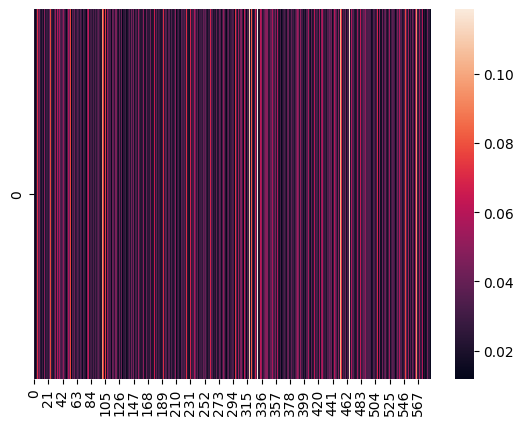

In [ ]:
import seaborn as sns
train_loss_normal_2d = tf.reshape(train_loss_normal, [1, -1])
sns.heatmap(train_loss_normal_2d)

In [ ]:
preds = tf.math.less(train_loss_normal, threshold)

In [ ]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=555>

In [ ]:
preds.shape

TensorShape([586])

In [ ]:
preds_annnomaly = tf.math.greater(train_loss_annomaly, threshold)
tf.math.count_nonzero(preds_annnomaly)

<tf.Tensor: shape=(), dtype=int64, numpy=412>

In [ ]:
preds_annnomaly.shape

TensorShape([414])

##Representation of True Values and False Values

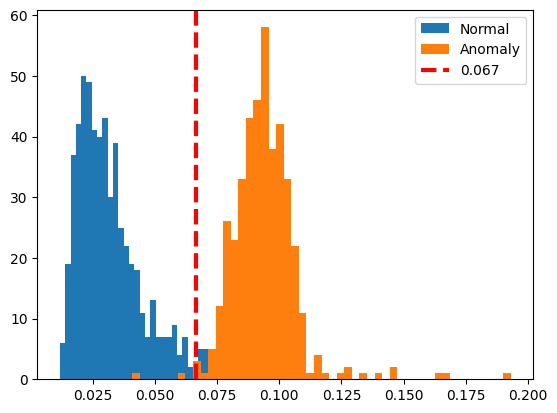

In [ ]:
plt.hist(train_loss_normal, bins=50, label='Normal')
plt.hist(train_loss_annomaly, bins=50, label='Anomaly')
plt.axvline(threshold, color='r',linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [ ]:
def plot_3d_loss(train_loss_normal, train_loss_anomaly):

  x = np.arange(train_loss_normal.shape[0])

  fig_normal = go.Figure(data=[go.Scatter3d(
      x=x,
      y=np.zeros_like(x),
      z=train_loss_normal.numpy().flatten(),
      mode='markers',
      marker=dict(
          size=5,
          color='blue',
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig_normal.update_layout(title='Reconstruction Loss for Normal Data',
                    scene=dict(
                        xaxis_title='Sample Index',
                        yaxis_title='Feature Index',
                        zaxis_title='Reconstruction Loss'),
                        width=600,
                        height=500)

  x = np.arange(train_loss_anomaly.shape[0])

  fig_anomaly = go.Figure(data=[go.Scatter3d(
      x=x,
      y=np.zeros_like(x),
      z=train_loss_anomaly.numpy().flatten(),
      mode='markers',
      marker=dict(
          size=5,
          color='red',
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig_anomaly.update_layout(title='Reconstruction Loss for Anomaly Data',
                    scene=dict(
                        xaxis_title='Sample Index',
                        yaxis_title='Feature Index',
                        zaxis_title='Reconstruction Loss'),
                        width=600,
                        height=500)

  fig_normal.show()
  fig_anomaly.show()

plot_3d_loss(train_loss_normal, train_loss_annomaly)

In [ ]:
def plot_3d_loss_diff(train_loss_normal, train_loss_anomaly):

  min_length = min(train_loss_normal.shape[0], train_loss_anomaly.shape[0])
  difference = train_loss_anomaly[:min_length] - train_loss_normal[:min_length]

  x = np.arange(min_length)

  fig_diff = go.Figure(data=[go.Scatter3d(
      x=x,
      y=np.zeros_like(x),
      z=difference.numpy().flatten(),
      mode='markers',
      marker=dict(
          size=5,
          color=difference.numpy().flatten(),
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig_diff.update_layout(title='Difference in Reconstruction Loss (Anomaly - Normal)',
                    scene=dict(
                        xaxis_title='Sample Index',
                        yaxis_title='Feature Index',
                        zaxis_title='Loss Difference'),
                        width=700,
                        height=600)

  fig_diff.show()

plot_3d_loss_diff(train_loss_normal, train_loss_annomaly)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[555  31]
 [  2 412]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97       586
     Anomaly       0.93      1.00      0.96       414

    accuracy                           0.97      1000
   macro avg       0.96      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



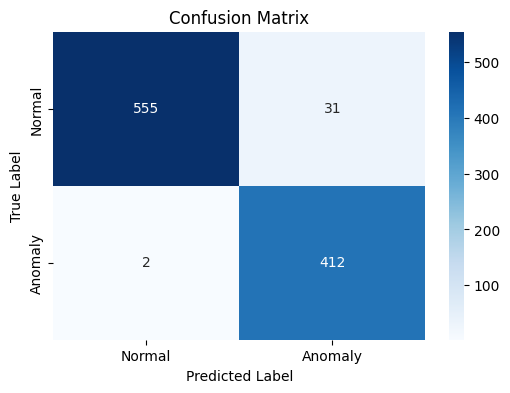

In [ ]:
## Confusion Matrix Implementation

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = (y_test.flatten() > 1.0).astype(int)

reconstruction_test = model.predict(x_test_scaled[:, 1:])  # Predict on test set features
# Calculate Mean Absolute Error (MAE) for each sample
mae_test = tf.keras.losses.mae(reconstruction_test, x_test_scaled[:, 1:]).numpy()
# Apply threshold to determine anomalies
y_pred = (mae_test > threshold).astype(int)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 4: Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly']))

# Step 5: Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

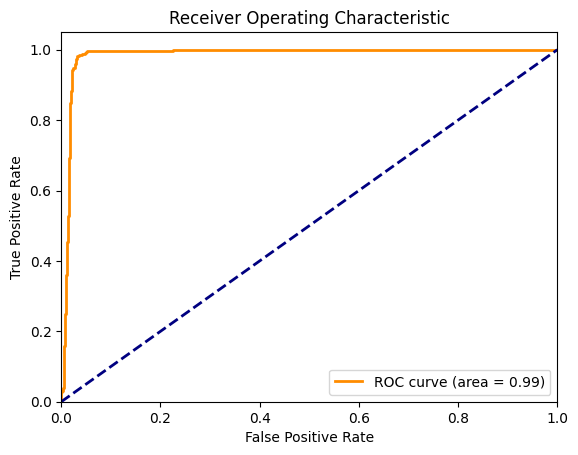

In [ ]:
  from sklearn.metrics import roc_curve, auc

  fpr, tpr, thresholds = roc_curve(y_true, mae_test)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

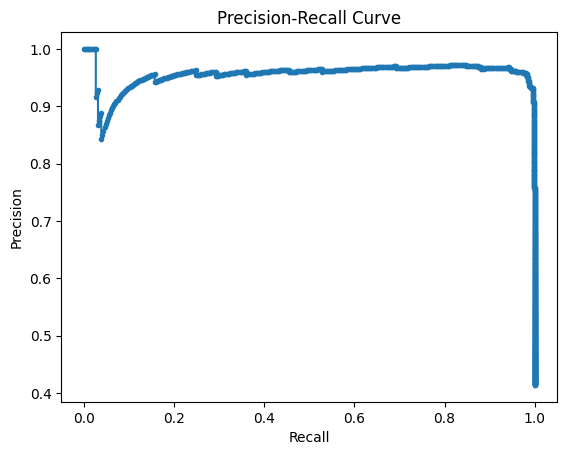

In [ ]:
  from sklearn.metrics import precision_recall_curve

  precision, recall, thresholds_pr = precision_recall_curve(y_true, mae_test)

  plt.figure()
  plt.plot(recall, precision, marker='.')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.show()